In [1]:
# 导入相关包
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
from tqdm import tqdm 
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import MinMaxScaler 
import xgboost as xgb 
import lightgbm as lgb 
from catboost import CatBoostRegressor 
import warnings 
from sklearn.model_selection import StratifiedKFold, KFold 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss 
warnings.filterwarnings('ignore')



In [2]:
data_train = pd.read_csv('./train_dataset/train_public.csv')
data_test = pd.read_csv('./test_public.csv')


In [3]:
data_train.shape

(10000, 39)

In [4]:
data_test.shape

(5000, 38)

In [5]:
data_train.columns


Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'isDefault'],
      dtype='object')

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   10000 non-null  int64  
 1   user_id                   10000 non-null  int64  
 2   total_loan                10000 non-null  float64
 3   year_of_loan              10000 non-null  int64  
 4   interest                  10000 non-null  float64
 5   monthly_payment           10000 non-null  float64
 6   class                     10000 non-null  object 
 7   employer_type             10000 non-null  object 
 8   industry                  10000 non-null  object 
 9   work_year                 9378 non-null   object 
 10  house_exist               10000 non-null  int64  
 11  censor_status             10000 non-null  int64  
 12  issue_date                10000 non-null  object 
 13  use                       10000 non-null  int64  
 14  post_co

In [7]:
data_train.describe()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,house_exist,censor_status,use,post_code,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0,9502.000000,9142.000000,9502.000000,9502.000000,9502.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.025210e+06,225209.587700,14402.126591,3.479600,13.222782,436.960427,0.612200,1.014600,1.762600,257.519100,...,1.0,5.690486,0.001422,8.467796,14.659019,8.098085,1.290600,2173.916100,335.232240,0.168300
std,1.438682e+04,14386.820956,8953.946807,0.853965,4.875755,261.754396,0.672203,0.787686,2.392031,201.351778,...,0.0,3.298546,0.037685,7.315953,8.263954,4.871797,1.449469,3027.539977,635.108825,0.374151
min,1.000008e+06,200008.000000,818.181818,3.000000,4.779000,30.440000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.012973e+06,212973.250000,7500.000000,3.000000,9.702000,248.820000,0.000000,0.000000,0.000000,99.000000,...,1.0,3.000000,0.000000,4.000000,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,1.025276e+06,225276.500000,12272.727270,3.000000,12.639000,371.525000,1.000000,1.000000,0.000000,197.000000,...,1.0,5.000000,0.000000,7.000000,13.000000,7.000000,1.000000,838.500000,0.000000,0.000000
75%,1.037694e+06,237694.500000,19636.363640,3.000000,15.985500,573.830000,1.000000,2.000000,4.000000,390.000000,...,1.0,7.000000,0.000000,11.000000,19.000000,11.000000,3.000000,3354.250000,413.675000,0.000000
max,1.049997e+06,249997.000000,47272.727270,5.000000,33.979000,1503.890000,4.000000,2.000000,13.000000,901.000000,...,1.0,33.000000,1.000000,93.000000,88.000000,50.000000,5.000000,18413.000000,5523.900000,1.000000


In [8]:
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')

There are 7 columns in train dataset with missing values.


In [9]:
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict() 
fea_null_moreThanHalf = {} 
for key,value in have_null_fea_dict.items(): 
    if value > 0.5: 
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf

{}

<AxesSubplot:>

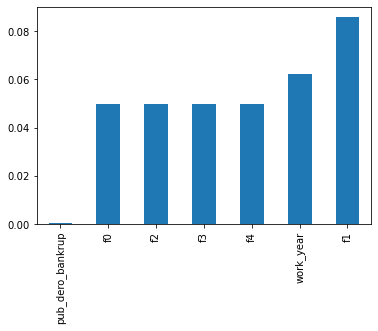

In [10]:
# nan可视化 
missing = data_train.isnull().sum()/len(data_train) 
missing = missing[missing > 0] 
missing.sort_values(inplace=True) 
missing.plot.bar()

In [11]:
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns) 
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns))) 
label = 'isDefault' 
numerical_fea.remove(label)


In [12]:
data_train.isnull().sum()

loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   622
house_exist                   0
censor_status                 0
issue_date                    0
use                           0
post_code                     0
region                        0
debt_loan_ratio               0
del_in_18month                0
scoring_low                   0
scoring_high                  0
known_outstanding_loan        0
known_dero                    0
pub_dero_bankrup              7
recircle_b                    0
recircle_u                    0
initial_list_status           0
app_type                      0
earlies_credit_mon            0
title                         0
policy_code                   0
f0                          498
f1      

###  用0填充空缺值

In [13]:
# data_train = data_train.fillna(0)

In [14]:
# data_train.isnull().sum()

### 平均数，众数填充

In [15]:
#按照平均数填充数值型特征 
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median()) 
data_test[numerical_fea] = data_test[numerical_fea].fillna(data_train[numerical_fea].median()) 
#按照众数填充类别型特征 
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode()) 
data_test[category_fea] = data_test[category_fea].fillna(data_train[category_fea].mode())

data_train.isnull().sum()


loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   622
house_exist                   0
censor_status                 0
issue_date                    0
use                           0
post_code                     0
region                        0
debt_loan_ratio               0
del_in_18month                0
scoring_low                   0
scoring_high                  0
known_outstanding_loan        0
known_dero                    0
pub_dero_bankrup              0
recircle_b                    0
recircle_u                    0
initial_list_status           0
app_type                      0
earlies_credit_mon            0
title                         0
policy_code                   0
f0                            0
f1      

In [16]:
#转化成时间格式 
for data in [data_train, data_test]: 
    data['issue_date'] = pd.to_datetime(data['issue_date'],format='%Y-%m-%d')



In [17]:
data['issue_date'].sample(10)

4340   2016-04-01
3176   2015-11-01
3047   2018-04-01
3740   2015-07-01
3132   2012-08-01
2978   2018-05-01
1097   2015-08-01
1419   2015-12-01
3967   2016-11-01
941    2014-02-01
Name: issue_date, dtype: datetime64[ns]

In [18]:
data_train['work_year'].value_counts(dropna=False).sort_index()

1 year        671
10+ years    3370
2 years       848
3 years       776
4 years       562
5 years       623
6 years       476
7 years       436
8 years       458
9 years       393
< 1 year      765
NaN           622
Name: work_year, dtype: int64

In [19]:
def work_year_to_int(s): 
    if pd.isnull(s): 
        return s 
    else:
        return np.int8(s.split()[0]) 
    
for data in [data_train, data_test]: 
    data['work_year'].replace(to_replace='10+ years', value='10 years', inplace=True) 
    data['work_year'].replace('< 1 year', '0 years', inplace=True) 
    data['work_year'] = data['work_year'].apply(work_year_to_int)


In [20]:
data['work_year'].value_counts(dropna=False).sort_index()

0.0      382
1.0      344
2.0      463
3.0      385
4.0      322
5.0      334
6.0      230
7.0      224
8.0      224
9.0      184
10.0    1630
NaN      278
Name: work_year, dtype: int64

In [21]:
data_train['earlies_credit_mon'].sample(10)

3150    2000/11/1
5636     2021/4/2
1607     2021/1/3
4412     2021/5/2
1768    1994/12/1
5069     1998/5/1
7876     2021/3/5
9091    2021/10/6
6687    1992/11/1
5935    1997/11/1
Name: earlies_credit_mon, dtype: object

In [25]:
for data in [data_train, data_test]: 
    data['earlies_credit_mon'] = pd.to_datetime(data['earlies_credit_mon'],format='%Y-%m-%d',errors='coerce')



In [26]:
data_train['earlies_credit_mon']

0      2021-12-01
1      1990-04-01
2      1991-10-01
3      2021-06-01
4      2021-05-02
          ...    
9995   2021-02-06
9996   1997-05-01
9997   1987-02-01
9998   1992-10-01
9999   2021-02-09
Name: earlies_credit_mon, Length: 10000, dtype: datetime64[ns]

In [46]:
class_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}

data_train['class'] = data_train['class'].map(class_dict)
data_test[]

In [29]:
cat_cols = ['employer_type', 'industry']

from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    lbl = LabelEncoder().fit(data_train[col])
    data_train[col] = lbl.transform(data_train[col])


In [30]:
data_train['employer_type']

0       3
1       3
2       3
3       1
4       3
       ..
9995    4
9996    3
9997    4
9998    3
9999    5
Name: employer_type, Length: 10000, dtype: int32

In [31]:
data_train['industry']

0       13
1       13
2        3
3       10
4        2
        ..
9995     7
9996     4
9997     2
9998     4
9999     2
Name: industry, Length: 10000, dtype: int32

In [34]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [35]:
def k_fold_serachParmaters(model,train_data, train_label, test_data):
    n_splits=5
    
    sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2020)
    pred_Test = np.zeros(len(test_data))
    
    auc_train, auc_val = 0, 0
    for tr_idx, val_idx in sk.split(train_data, train_label):
        x_train = train_data.iloc[tr_idx]
        y_train = train_label.iloc[tr_idx]
        x_val = train_data.iloc[val_idx]
        y_val = train_label.iloc[val_idx]

        model.fit(x_train, y_train, 
                  eval_set=[(x_val, y_val)], 
                  categorical_feature = cat_cols,
                 early_stopping_rounds=100,
                 verbose=False)

        pred_Test += model.predict_proba(test_data)[:, 1]/n_splits

        pred = model.predict(x_val)
        auc_val += roc_auc_score(y_val,pred)/n_splits
        
        pred = model.predict(x_train)
        auc_train += roc_auc_score(y_train, pred)/n_splits
        
        
    return auc_val, pred_Test

In [47]:
train_data=data_train.drop(['loan_id', 'user_id', 'isDefault'], axis=1)
train_label=data_train['isDefault']

n_splits=5
    
sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2020)
    

for tr_idx, val_idx in sk.split(train_data, train_label):
    x_train = train_data.iloc[tr_idx]
    y_train = train_label.iloc[tr_idx]
    x_val = train_data.iloc[val_idx]
    y_val = train_label.iloc[val_idx]

In [48]:
clf = lgb.LGBMClassifier(
    num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
    max_depth=7,learning_rate=0.01,
    n_estimators=2050,n_jobs=-1)



In [49]:
clf.fit(x_train, y_train, eval_set=[(x_val, y_val)], categorical_feature = cat_cols,early_stopping_rounds=100,verbose=False)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: issue_date, earlies_credit_mon